In [1]:
# Parameters initialization and plotting the simulation
# Import necessary routines
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as ticker
import math
import timeit

plt.switch_backend("nbagg")           # plots within this notebook

from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:90% !important; }</style>"))
#(HTML("<style>.output_wrapper, .output {height: 600px !important;}</style>"))

C:\Users\Qiao\AppData\Local\Temp\ipykernel_2528\3602612518.py:13: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
# FUNCTION decimal range step value  
def drange(start, stop, step):
    r = start
    while r < stop:
        yield r
        r += step

In [3]:
def Dx(u, nx, dx, order):
    # standard low-order finite difference operators for first derivatives du/dx
    
    # Initialize the derivative vector
    ux = 0*u
    
    m = nx-1
    
    # central difference approximation
    if order == 2:
        # calculate partial derivatives on the boundaries:[0, m] with periodic difference closure
        #ux[0, :] = (u[1, :] -  u[m-1, :])/(2*dx)
        #ux[m, :] = (u[1, :] -  u[m-1, :])/(2*dx)
        # 
        ux[0, :] = (u[1, :] -  u[0, :])/dx
        ux[m, :] = (u[m, :] -  u[m-1, :])/dx
        #calculate partial derivatives in the interior:(1:nx-1)
        for j in range(1, m):
            ux[j, :] = (u[j+1, :] -  u[j-1, :])/(2.0*dx)
    elif order == 4:
        ux[0, :] = -24./17*u[0, :] + 59./34*u[1, :]  - 4./17*u[2, :] - 3./34*u[3, :]
        ux[1, :] = -1./2*u[0, :] + 1./2*u[2, :]
        ux[2, :] = 4./43*u[0, :] - 59./86*u[1, :]  + 59./86*u[3, :] - 4./43*u[4, :]
        ux[3, :] = 3./98*u[0, :] - 59./98*u[2, :]  + 32./49*u[4, :] - 4./49*u[5, :]


        ux[nx-1, :] = 24./17*u[nx-1, :] - 59./34*u[nx-2, :]  + 4./17*u[nx-3, :] + 3./34*u[nx-4, :]
        ux[nx-2, :] = 1./2*u[nx-1, :] - 1./2*u[nx-3, :]
        ux[nx-3, :] = -4./43*u[nx-1, :] + 59./86*u[nx-2, :]- 59./86*u[nx-4, :]+ 4./43*u[nx-5, :]
        ux[nx-4, :] = -3./98*u[nx-1, :] + 59./98*u[nx-3, :]- 32./49*u[nx-5, :]+ 4./49*u[nx-6, :]

        # interior points x_j (j = 4, ... nx-5)     
        #------------------------------------------------------------------------------------------------------------------------------
        for j in range(4, nx-4):
            ux[j, :] = 1./12*u[j-2, :] - 2./3*u[j-1, :] + 2./3*u[j+1, :] - 1./12*u[j+2, :]

        ux[:, :] = ux/dx
        
    return ux
        
def Dy(u, ny, dy, order):
    # standard low-order finite difference operators for first derivatives du/dx
    
    # Initialize the derivative vector
    uy = 0*u
    
    m = ny-1
    # central difference approximation
    if order == 2:
        # calculate partial derivatives on the boundaries:[0, m] with periodic difference closure
        #uy[:, 0] = (u[:, 1] -  u[:, m-1])/(2*dy)
        #uy[:, m] = (u[:, 1] -  u[:, m-1])/(2*dy)
        uy[:, 0] = (u[:,1] -  u[:,0])/dy
        uy[:,m] = (u[:,m] -  u[:,m-1])/dy

        #calculate partial derivatives in the interior:(1:nx-1)
        for j in range(1, m):
            uy[:, j] = (u[:, j+1] -  u[:, j-1])/(2.0*dy)
    elif order == 4:
        #periodic
        #uy[:, 0] = 1./12*u[:, m-2] - 2./3*u[:, m-1] + 2./3*u[:, 1] - 1./12*u[:, 2]
        #uy[:, 1] = 1./12*u[:, m-1] - 2./3*u[:, 0] + 2./3*u[:, 2] - 1./12*u[:, 3]
        
        #uy[:, ny-1] = 1./12*u[:, m-2] - 2./3*u[:, m-1] + 2./3*u[:, 1] - 1./12*u[:, 2]
        #uy[:, ny-2] = 1./12*u[:, m-3] - 2./3*u[:, m-2] + 2./3*u[:, m] - 1./12*u[:, 1]
        
        #for j in range(2, ny-2):
        #    uy[:, j] = 1./12*u[:, j-2] - 2./3*u[:, j-1] + 2./3*u[:, j+1] - 1./12*u[:, j+2]

        #SBP
        uy[:, 0] = -24./17*u[:, 0] + 59./34*u[:, 1]  - 4./17*u[:, 2] - 3./34*u[:, 3]
        uy[:, 1] = -1./2*u[:, 0] + 1./2*u[:, 2]
        uy[:, 2] = 4./43*u[:, 0] - 59./86*u[:, 1]  + 59./86*u[:, 3] - 4./43*u[:, 4]
        uy[:, 3] = 3./98*u[:, 0] - 59./98*u[:, 2]  + 32./49*u[:, 4] - 4./49*u[:, 5]
        
        uy[:, ny-1] = 24./17*u[:, ny-1] - 59./34*u[:, ny-2]  + 4./17*u[:, ny-3] + 3./34*u[:, ny-4]
        uy[:, ny-2] = 1./2*u[:, ny-1] - 1./2*u[:, ny-3]
        uy[:, ny-3] = -4./43*u[:, ny-1] + 59./86*u[:, ny-2]- 59./86*u[:, ny-4]+ 4./43*u[:, ny-5]
        uy[:, ny-4] = -3./98*u[:, ny-1] + 59./98*u[:, ny-3]- 32./49*u[:, ny-5]+ 4./49*u[:, ny-6]
        
        # interior points x_j (j = 4, ... nx-5)     
        #------------------------------------------------------------------------------------------------------------------------------
        for j in range(4, ny-4):
            uy[:,j] = 1./12*u[:,j-2] - 2./3*u[:,j-1] + 2./3*u[:,j+1] - 1./12*u[:,j+2]
        
        uy[:, :] = uy/dy
    return uy

In [4]:
def mms_func(x,y,t,U,V,H,g,f):
    import numpy as np
    Lx = x[-1,0]-x[0,0]
    Ly = y[0,-1]-y[0,0]
    h1 = 500
    xs, ys = -Lx/4 ,-Ly/4

    h = H + h1 * np.exp(-((x - xs - U * t) ** 2) / (Lx / 10) ** 2) * np.exp(-((y - ys - V * t) ** 2) / (Ly / 10) ** 2)
    v = (-2 * (x - xs - U * t) / (f * (Lx / 10) ** 2)) * g * (h - H)
    u = (-2 * (y - ys - V * t) / (f * (Ly / 10) ** 2)) * g * (h - H)
    
    dh_dt = h1 * np.exp(-((x - xs - U * t) ** 2) / (Lx / 10) ** 2) * np.exp(-((y - ys - V * t) ** 2) / (Ly / 10) ** 2) * ((2 * U * (x - xs - U * t)) / (Lx / 10) ** 2 + (2 * V * (y - ys - V * t)) / (Ly / 10) ** 2)
    dh_dx = h1 * np.exp(-((x - xs - U * t) ** 2) / (Lx / 10) ** 2) * np.exp(-((y - ys - V * t) ** 2) / (Ly / 10) ** 2) * (-2 * (x - xs - U * t) / (Lx / 10) ** 2)
    dh_dy = h1 * np.exp(-((x - xs - U * t) ** 2) / (Lx / 10) ** 2) * np.exp(-((y - ys - V * t) ** 2) / (Ly / 10) ** 2) * (-2 * (y - ys - V * t) / (Ly / 10) ** 2)
    
    dv_dt = 2 * U * g /(f * (Lx / 10) ** 2) * (h - H) + (-2 * (x - xs - U * t) / (f * (Lx / 10) ** 2)) * g * dh_dt
    dv_dx = (-2 * g /(f * (Lx / 10) ** 2)) * (h - H) + (-2 * (x - xs - U * t) / (f * (Lx / 10) ** 2)) * g * dh_dx
    dv_dy = (-2 * (x - xs - U * t) / (f * (Lx / 10) ** 2)) * g * dh_dy
    
    du_dt =  2 * V * g /(f * (Ly / 10) ** 2) * (h - H) + (-2 * (y - ys - V * t) / (f * (Ly / 10) ** 2)) * g * dh_dt
    du_dx = (-2 * (y - ys - V * t) / (f * (Ly / 10) ** 2)) * g * dh_dx
    du_dy = (-2 * g / (f * (Ly / 10) ** 2)) * (h - H) + (-2 * (y - ys - V * t) / (f * (Ly / 10) ** 2)) * g * dh_dy
    
    f_u = du_dt + U*du_dx + g*dh_dx + V*du_dy - f*v
    f_v = dv_dt + U*dv_dx + + V*dv_dy + g*dh_dy + f*u
    f_h = dh_dt + H*du_dx + U*dh_dx + H*dv_dy + V*dh_dy
    return u,v,h,f_u,f_v,f_h

In [5]:
def w_variables(uu,vv,hh,g,c,n,uu_e,vv_e,hh_e):
    w1 = 1/(2**(1/2))*(g*(hh-hh_e)/c-(n[0]*(uu-uu_e)+n[1]*(vv-vv_e)))
    w2 = - n[1]*(uu-uu_e)+ n[0]*(vv-vv_e)
    w3 = 1/(2**(1/2))*(g*(hh-hh_e)/c+(n[0]*(uu-uu_e)+n[1]*(vv-vv_e)))
    return w1,w2,w3

In [6]:
def rate(u, v, h, nx, dx, ny, dy, U, V, H, g, f, t, order, mms):
    
    # set penalty parameter   
    if order == 4:
        H1 = (17/48)*dx
    elif order == 2:
        H1 = (1/2)*dx
    beta_3 = 0
    alpha_3 = 0
    alpha_2 = 0
    alpha_4 = 0
    
    # Exact solution
    u_e,v_e,h_e,f_u,f_v,f_h = 0*u,0*u,0*u,0*u,0*u,0*u
    if mms:
        u_e,v_e,h_e,f_u,f_v,f_h = mms_func(x,y,t,U,V,H,g,f)
    
    #  compute numerical derivative of u,v,h
    dudx = Dx(u, nx, dx, order)
    dudy = Dy(u, ny, dy, order)
    dvdx = Dx(v, nx, dx, order)
    dvdy = Dy(v, ny, dy, order)
    dhdx = Dx(h, nx, dx, order)
    dhdy = Dy(h, ny, dy, order)

    r_u = -U*dudx - g*dhdx - V*dudy + f*v + f_u
    r_v = -U*dvdx - V*dvdy - g*dhdy -f*u + f_v
    r_h = -H*dudx - U*dhdx - H*dvdy - V*dhdy + f_h
    
    # x= 0
    n = [-1,0]
    w1,w2,w3 = w_variables(u[0, :],v[0, :],h[0, :],g,c,n,u_e[0, :],v_e[0, :],h_e[0, :])
    G_01 = w1 - beta_3*w3
    G_02 = w2 - alpha_3*w3
    omega = n[0]*U + n[1]*V
    tau1 = (omega-c)/H1
    tau2 = omega/H1
    
    # y= 0
    n = [0,-1]
    w1,w2,w3 = w_variables(u[:, 0],v[:, 0],h[:, 0],g,c,n,u_e[:, 0],v_e[:, 0],h_e[:, 0])
    G_03 = w1 - beta_3*w3
    G_04 = w2 - alpha_3*w3
    omega = n[0]*U + n[1]*V
    tau3 = (omega-c)/H1
    tau4 = omega/H1
    
    # x = L
    n = [1,0]
    w1,w2,w3 = w_variables(u[-1, :],v[-1, :],h[-1, :],g,c,n,u_e[-1, :],v_e[-1, :],h_e[-1, :])
    G_L1 = w1 - alpha_2*w2 - alpha_4*w3
    omega = n[0]*U + n[1]*V
    tau5 = (omega-c)/H1
    
    # y = L
    n = [0,1]
    w1,w2,w3 = w_variables(u[:, -1],v[:, -1],h[:, -1],g,c,n,u_e[:, -1],v_e[:, -1],h_e[:, -1])
    G_L2 = w1 - alpha_2*w2 - alpha_4*w3
    omega = n[0]*U + n[1]*V
    tau6 = (omega-c)/H1
    
    # penalize the boundary term
    #r_u[0, :] = r_u[0, :] + tau1*G_01/2
    r_u[0, :] = r_u[0, :] + tau1*G_01/(2**(1/2))
    r_v[0, :] = r_v[0, :] - tau2*G_02
    r_h[0, :] = r_h[0, :] + tau1*G_01/(2**(1/2))*c/g
    
    r_u[:, 0] = r_u[:, 0] + tau4*G_04
    r_v[:, 0] = r_v[:, 0] + tau3*G_03/(2**(1/2))
    r_h[:, 0] = r_h[:, 0] + tau3*G_03/(2**(1/2))*c/g
    
    r_u[-1, :] = r_u[-1, :] - tau5*G_L1/(2**(1/2))
    r_h[-1, :] = r_h[-1, :] + tau5*G_L1/(2**(1/2))*c/g
    
    r_v[:, -1] = r_u[:, -1] - tau6*G_L2/(2**(1/2))
    r_h[:, -1] = r_h[:, -1] + tau6*G_L2/(2**(1/2))*c/g
    
    return r_u, r_v, r_h

In [7]:
# function of RK4
def RK4(u, v, h, nx, dx, ny, dy, U, V, H, g, f, t, order, mms):
    k1_u, k1_v, k1_h = rate(u, v, h, nx, dx, ny, dy, U, V, H, g, f, t, order, mms)
    k2_u, k2_v, k2_h = rate(u+dt/2*k1_u, v+dt/2*k1_v,h+dt/2*k1_h, nx, dx, ny, dy, U, V, H, g, f, t+0.5*dt, order, mms)
    k3_u, k3_v, k3_h = rate(u+dt/2*k2_u, v+dt/2*k2_v,h+dt/2*k2_h, nx, dx, ny, dy, U, V, H, g, f, t+0.5*dt, order, mms)
    k4_u, k4_v, k4_h = rate(u+dt*k3_u, v+dt*k3_v,h+dt*k3_h, nx, dx, ny, dy, U, V, H, g, f, t+dt, order, mms)
        
    # corrector
    h_u = u + dt/6*(k1_u + 2*k2_u + 2*k3_u + k4_u)
    h_v = v + dt/6*(k1_v + 2*k2_v + 2*k3_v + k4_v)
    h_h = h + dt/6*(k1_h + 2*k2_h + 2*k3_h + k4_h)
    return h_u,h_v,h_h

In [8]:
# Initialization parameters 
Lx = 10000000.0     # length of the domain (x-axis)
Ly = 10000000.0     # width of the domain (y-axis)

H = 5000
f = 0.729*10**(-4)
g = 9.8
U = 50
V = 50
#c = (g*H)**(1/2)
c = (U**2+V**2)**(1/2) + (g*H)**(1/2)
t = 0                                # initial time
#Tend = 3600*48                             # final time
Tend = 3600*48                             # final time
iplot = 10                             # snapshot frequency

order = 4

nx = 128                               # grid points in x (orgiginally set to 200)
ny = 128                               # grid points in y (orgiginally set to 200)

dx = Lx/(nx-1)                         # spatial step in x
dy = Ly/(ny-1)                         # spatial step in y

cfl = 0.5
dt = cfl*dx/c                            # Time step
nt = int(round(Tend/dt))                # number of time steps
dt = Tend/(nt-1)
n = 0

# Initialize arrays for the mesh
x = np.zeros((nx, ny))
y = np.zeros((nx, ny))
# generate a Cartesian mesh
for i in range(0, nx):
    for j in range(0, ny):
        x[i, j] = i*dx
        y[i, j] = j*dy

# Initialize arrays for fields into nx*ny grid points
u = np.zeros((nx,ny))
v = np.zeros((nx,ny))
h = np.zeros((nx,ny))

# Initialize: particle velocity (v); and shear stress (s)
delta = 0.05*Lx
u = 0*x
v = 0*x
h = np.exp(-(x-0.5*Lx)**2/delta-(y-0.5*Ly)**2/delta)

mms = True
u_e,v_e,h_e,f_u,f_v,f_h = 0*u,0*u,0*u,0*u,0*u,0*u
if mms:
    u_e,v_e,h_e,f_u,f_v,f_h = mms_func(x,y,0,U,V,H,g,f)
    u = 0*u_e + u_e
    v = 0*v_e + v_e
    h = 0*h_e + h_e

T = [0]

<IPython.core.display.Javascript object>


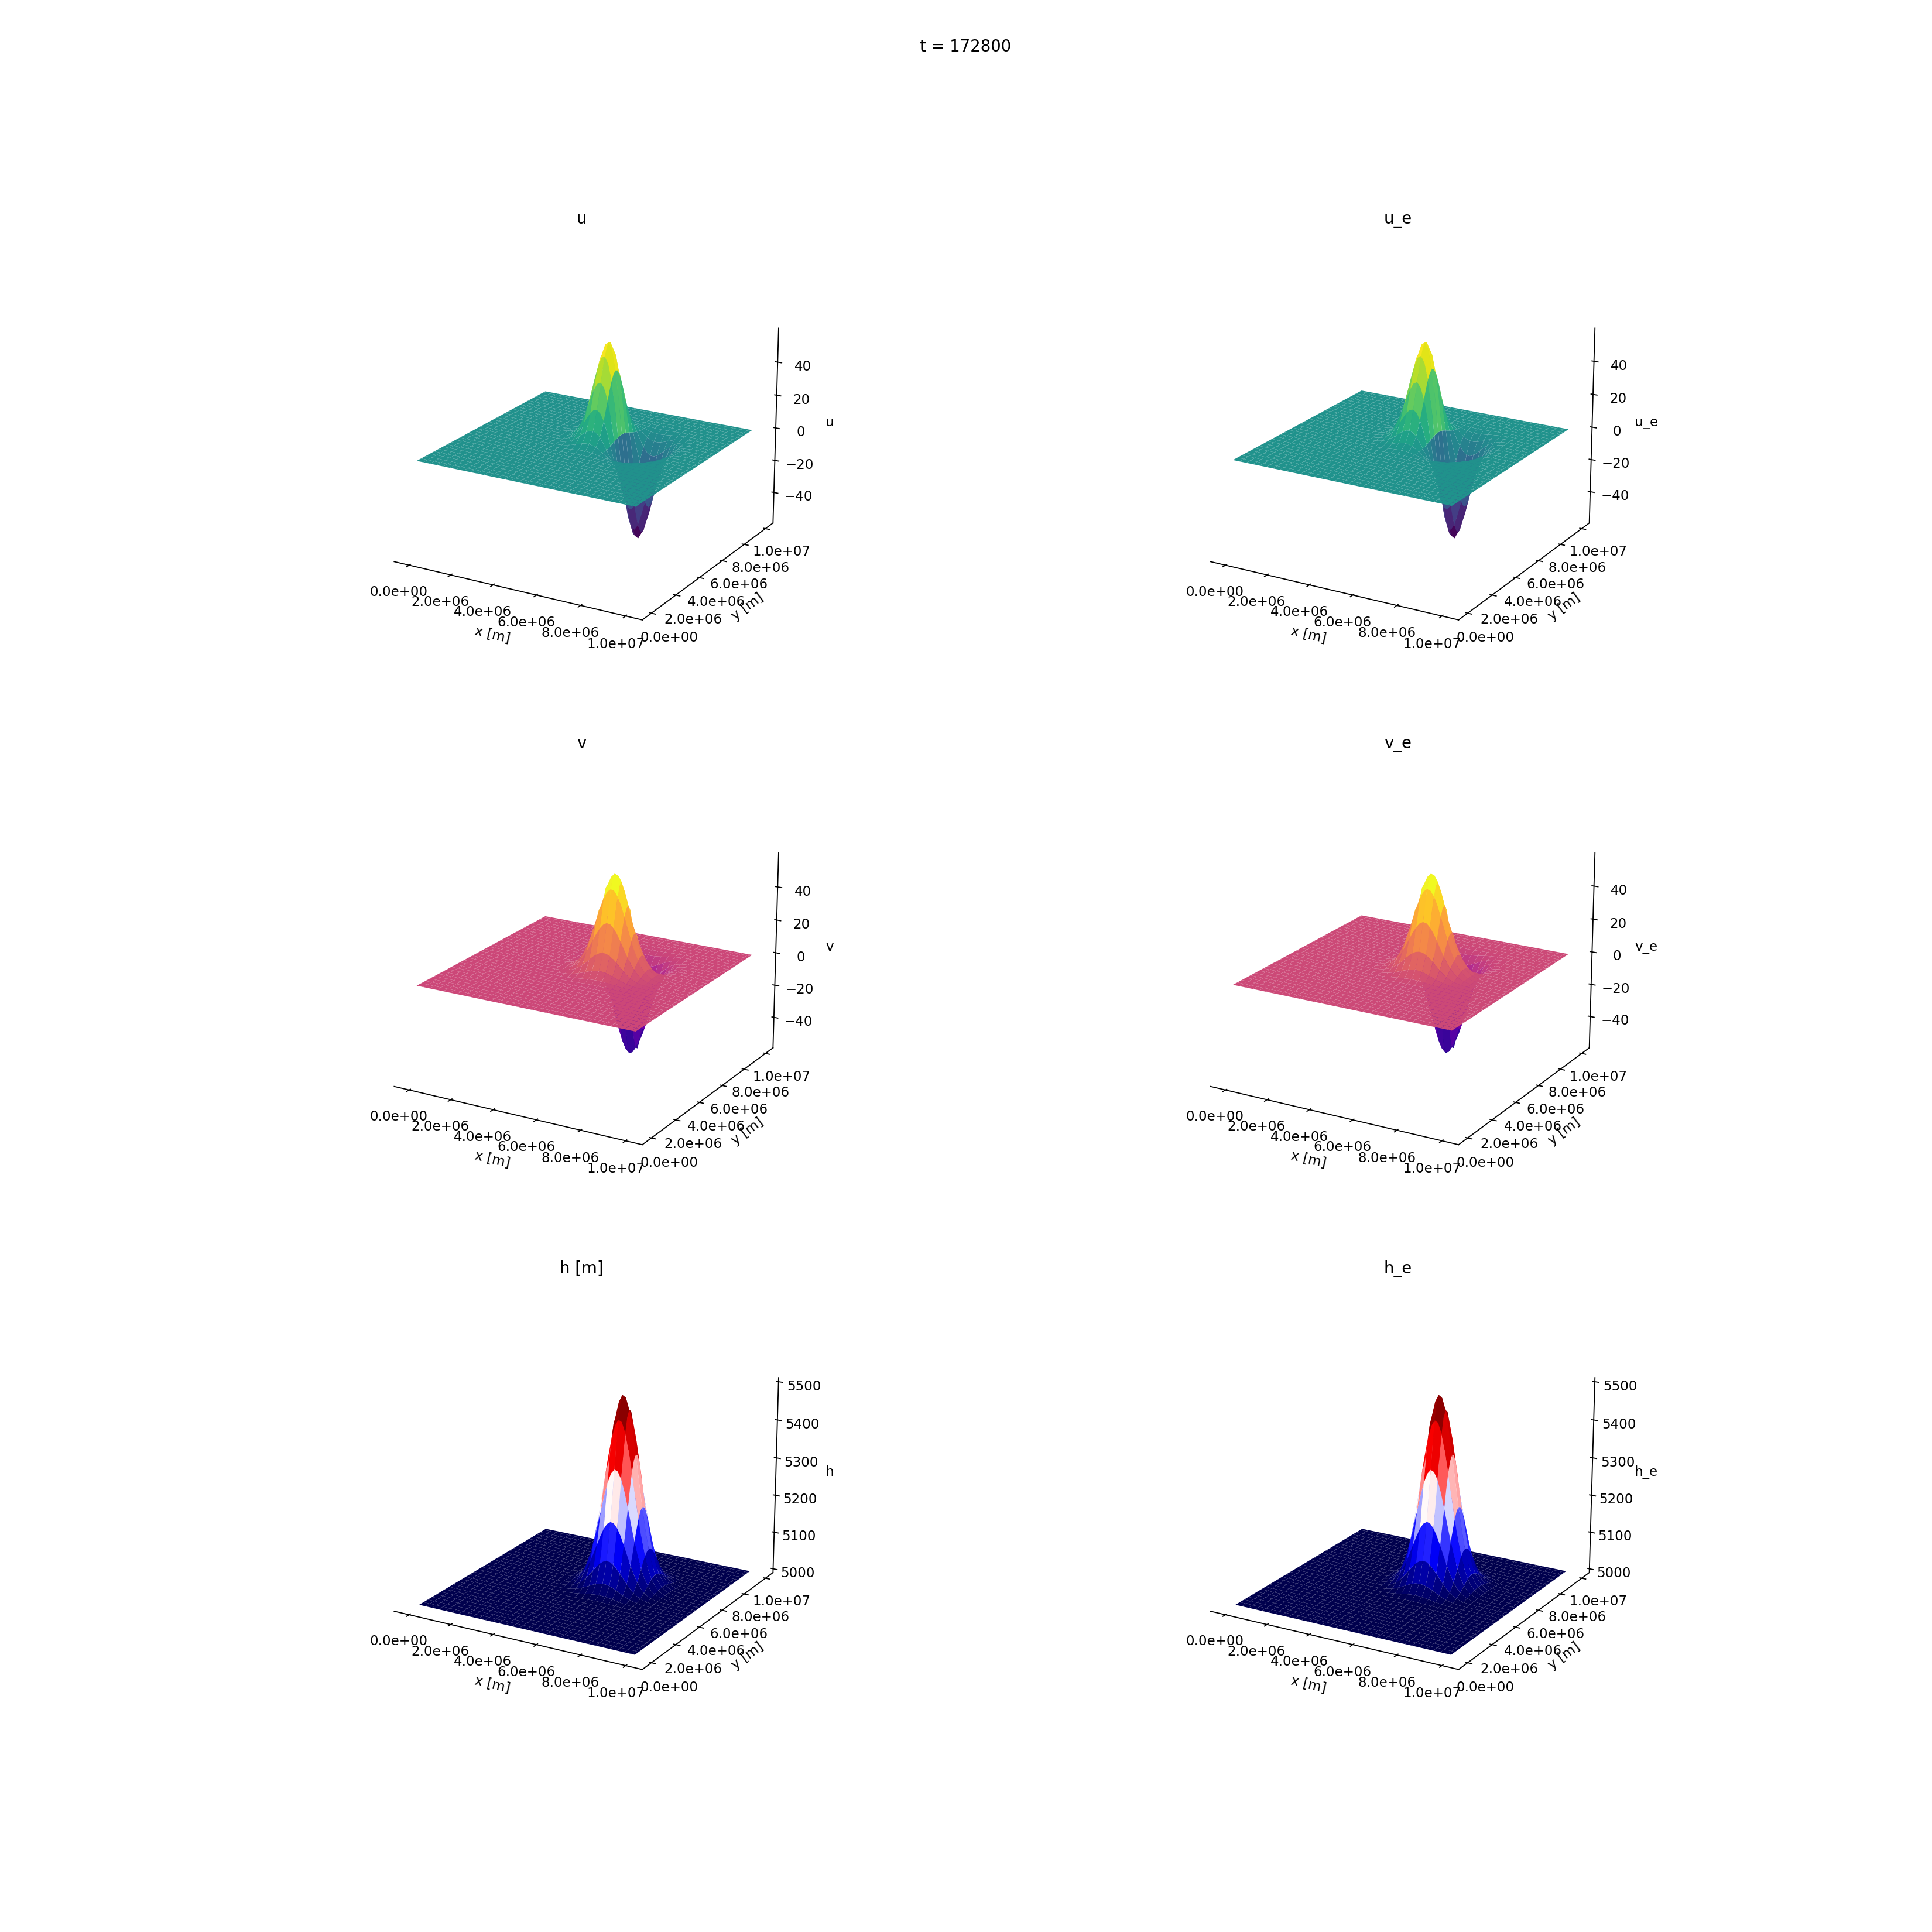

C:\Users\Qiao\AppData\Local\Temp\ipykernel_2528\173958920.py:96: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


In [9]:
fig = plt.figure(figsize=(20, 20))

# Create the subplots for the 3D plots
ax1 = fig.add_subplot(321, projection='3d')
ax2 = fig.add_subplot(322, projection='3d')
ax3 = fig.add_subplot(323, projection='3d')
ax4 = fig.add_subplot(324, projection='3d')
ax5 = fig.add_subplot(325, projection='3d')
ax6 = fig.add_subplot(326, projection='3d')

def scientific_format(x, pos):
    return f'{x:.1e}'

formatter = ticker.FuncFormatter(scientific_format)

fig.patch.set_alpha(0)

for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    # Set pane colors to fully transparent for side panes
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # 隐藏 X 轴侧面
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # 隐藏 Y 轴侧面
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # 隐藏 Z 轴侧面

    # Enable the bottom grid specifically
    ax.xaxis._axinfo["grid"].update(color="grey", linestyle="-", linewidth=1.0)  # 仅显示底部 X 轴网格
    ax.yaxis._axinfo["grid"].update(color="grey", linestyle="-", linewidth=1.0)  # 仅显示底部 Y 轴网格

    # Hide tick labels on the side panes to ensure no values are displayed
    ax.yaxis.set_ticklabels([])  # 隐藏 Y 轴侧面的刻度标签
    ax.zaxis.set_ticklabels([])  # 隐藏 Z 轴侧面的刻度
    ax.view_init(elev=20)

# Plot for u
ax1.plot_surface(x, y, u.transpose(), cmap='viridis')
ax1.set_title('u')
ax1.set_xlabel('x [m]')
ax1.set_ylabel('y [m]')
ax1.set_zlabel('u')
ax1.xaxis.set_major_formatter(formatter)
ax1.yaxis.set_major_formatter(formatter)
ax1.grid(False)

# Plot for u_e
ax2.plot_surface(x, y, u_e.transpose(), cmap='viridis')
ax2.set_title('u_e')
ax2.set_xlabel('x [m]')
ax2.set_ylabel('y [m]')
ax2.set_zlabel('u_e')
ax2.xaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
ax2.grid(False)

# Plot for v
ax3.plot_surface(x, y, v.transpose(), cmap='plasma')
ax3.set_title('v')
ax3.set_xlabel('x [m]')
ax3.set_ylabel('y [m]')
ax3.set_zlabel('v')
ax3.xaxis.set_major_formatter(formatter)
ax3.yaxis.set_major_formatter(formatter)
ax3.grid(False)

# Plot for v_e
ax4.plot_surface(x, y, v_e.transpose(), cmap='plasma')
ax4.set_title('v_e')
ax4.set_xlabel('x [m]')
ax4.set_ylabel('y [m]')
ax4.set_zlabel('v_e')
ax4.xaxis.set_major_formatter(formatter)
ax4.yaxis.set_major_formatter(formatter)
ax4.grid(False)

# Plot for h (H+h)
ax5.plot_surface(x, y, h.transpose(), cmap='seismic')
ax5.set_title('h [m]')
ax5.set_xlabel('x [m]')
ax5.set_ylabel('y [m]')
ax5.set_zlabel('h')
ax5.set_zlim(5000,5500)
ax5.xaxis.set_major_formatter(formatter)
ax5.yaxis.set_major_formatter(formatter)
ax5.grid(False)

# Plot for h_e (H+h_e)
ax6.plot_surface(x, y, h_e.transpose(), cmap='seismic')
ax6.set_title('h_e')
ax6.set_xlabel('x [m]')
ax6.set_ylabel('y [m]')
ax6.set_zlabel('h_e')
ax6.set_zlim(5000,5500)
ax6.xaxis.set_major_formatter(formatter)
ax6.yaxis.set_major_formatter(formatter)
ax6.grid(False)

# Adjust the layout for the figure
plt.tight_layout()

# Add a global title
fig.suptitle(f"t = {Tend}")

plt.show()

In [10]:
# initialise timer
start = timeit.default_timer()

# loop in time
#u = np.zeros((nx,ny))            # discrete domain
for t in drange(0, Tend, dt):
    n = n+1
    #compute numerical solution
    
    u,v,h = RK4(u, v, h, nx, dx, ny, dy, U, V, H, g, f, t, order, mms)
    
    # Exact solution
    u_e,v_e,h_e,f_u,f_v,f_h = 0*u,0*u,0*u,0*u,0*u,0*u
    if mms:
        u_e,v_e,h_e,f_u,f_v,f_h = mms_func(x,y,t+dt,U,V,H,g,f)
   
    T.append(t)
    # Updating plots
    if n % iplot == 0:           # you can change the speed of the plot by increasing the plotting interval
        
        fig.patch.set_alpha(0)
        
        for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
            # Set pane colors to fully transparent for side panes
            ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # 隐藏 X 轴侧面
            ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # 隐藏 Y 轴侧面
            ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))  # 隐藏 Z 轴侧面

            # Enable the bottom grid specifically
            ax.xaxis._axinfo["grid"].update(color="grey", linestyle="-", linewidth=1.0)  # 仅显示底部 X 轴网格
            ax.yaxis._axinfo["grid"].update(color="grey", linestyle="-", linewidth=1.0)  # 仅显示底部 Y 轴网格

            # Hide tick labels on the side panes to ensure no values are displayed
            ax.yaxis.set_ticklabels([])  # 隐藏 Y 轴侧面的刻度标签
            ax.zaxis.set_ticklabels([])  # 隐藏 Z 轴侧面的刻度
            ax.view_init(elev=20)
        
        ax1.clear()
        ax1.plot_surface(x, y, u.transpose(), cmap='viridis')
        ax1.set_title('u')
        ax1.set_xlabel('x [m]')
        ax1.set_ylabel('y [m]')
        ax1.set_zlabel('u')
        ax1.xaxis.set_major_formatter(formatter)
        ax1.yaxis.set_major_formatter(formatter)
        ax1.grid(False)
        
        ax2.clear()
        ax2.plot_surface(x, y, u_e.transpose(), cmap='viridis')
        ax2.set_title('u_e')
        ax2.set_xlabel('x [m]')
        ax2.set_ylabel('y [m]')
        ax2.set_zlabel('u_e')
        ax2.xaxis.set_major_formatter(formatter)
        ax2.yaxis.set_major_formatter(formatter)
        ax2.grid(False)
        
        ax3.clear()
        ax3.plot_surface(x, y, v.transpose(), cmap='plasma')
        ax3.set_title('v')
        ax3.set_xlabel('x [m]')
        ax3.set_ylabel('y [m]')
        ax3.set_zlabel('v')
        ax3.xaxis.set_major_formatter(formatter)
        ax3.yaxis.set_major_formatter(formatter)
        ax3.grid(False)

        ax4.clear()
        ax4.plot_surface(x, y, v_e.transpose(), cmap='plasma')
        ax4.set_title('v_e')
        ax4.set_xlabel('x [m]')
        ax4.set_ylabel('y [m]')
        ax4.set_zlabel('v_e')
        ax4.xaxis.set_major_formatter(formatter)
        ax4.yaxis.set_major_formatter(formatter)
        ax4.grid(False)

        ax5.clear()
        ax5.plot_surface(x, y, h.transpose(), cmap='seismic')
        ax5.set_title('h [m]')
        ax5.set_xlabel('x [m]')
        ax5.set_ylabel('y [m]')
        ax5.set_zlabel('h')
        ax5.set_zlim(5000,5500)
        ax5.xaxis.set_major_formatter(formatter)
        ax5.yaxis.set_major_formatter(formatter)
        ax5.grid(False)
        
        ax6.clear()
        ax6.plot_surface(x, y, h_e.transpose(), cmap='seismic')
        ax6.set_title('h_e')
        ax6.set_xlabel('x [m]')
        ax6.set_ylabel('y [m]')
        ax6.set_zlabel('h_e')
        ax6.set_zlim(5000,5500)
        ax6.xaxis.set_major_formatter(formatter)
        ax6.yaxis.set_major_formatter(formatter)
        ax6.grid(False)
        #im1.set_data(u.transpose())
        #im2.set_data(u_e.transpose())
        #im3.set_data(v.transpose())
        #im4.set_data(v_e.transpose())
        #im5.set_data(h.transpose())
        #im6.set_data(h_e.transpose())
        plt.gcf().canvas.draw()
        #plt.show()
        #print(it)
        
plt.ioff()
plt.show()

In [11]:
stop = timeit.default_timer()

print('total simulation time = ', stop - start, 's')            # print the time required for simulation
print('number of grid points = ', nx, 'x', ny)                  # print the degree of freedom
print('uniform spatial step = ', dx, 'm')                      # print the spatial step

#l2_error = np.sqrt(np.sum((u_e-u)**2)*dx*dy+np.sum((v_e-v)**2)*dx*dy+np.sum((h_e-h)**2)*dx*dy)
l2_u = np.sqrt(np.sum((u_e)**2)*dx*dy)
l2_v = np.sqrt(np.sum((v_e)**2)*dx*dy)
l2_h = np.sqrt(np.sum((h_e)**2)*dx*dy)


l2_error_u = np.sqrt(np.sum((u_e-u)**2)*dx*dy)/l2_u
l2_error_v = np.sqrt(np.sum((v_e-v)**2)*dx*dy)/l2_v
l2_error_h = np.sqrt(np.sum((h_e-h)**2)*dx*dy)/l2_h
print('l2 error u= ', l2_error_u)          # print the l2 error
print('log2 l2 error u= ', np.log2(l2_error_u))  # print the log2 of l2 error
print('l2 error v= ', l2_error_v)          # print the l2 error
print('log2 l2 error v= ', np.log2(l2_error_v))  # print the log2 of l2 error
print('l2 error h= ', l2_error_h)          # print the l2 error
print('log2 l2 error h= ', np.log2(l2_error_h))  # print the log2 of l2 error


total simulation time =  37.18887900002301 s
number of grid points =  64 x 64
uniform spatial step =  158730.15873015873 m
l2 error u=  0.010958624416167788
log2 l2 error u=  -6.511789474735707
l2 error v=  0.010993434518230582
log2 l2 error v=  -6.507214012920228
l2 error h=  5.5068647315155933e-05
log2 l2 error h=  -14.148409303312906


In [12]:
#64
#l2 error u=  0.010958624416167788
#log2 l2 error u=  -6.511789474735707
#l2 error v=  0.010993434518230582
#log2 l2 error v=  -6.507214012920228
#l2 error h=  5.5068647315155933e-05
#log2 l2 error h=  -14.148409303312906

#128
#l2 error u=  0.0006654908095362624
#log2 l2 error u=  -10.553293636970526
#l2 error v=  0.0006693474862622122
#log2 l2 error v=  -10.544957010898683
#l2 error h=  3.4452833830249483e-06
#log2 l2 error h=  -18.14694591630159
p1_u = -6.511789474735707 + 10.553293636970526
p1_v = -6.507214012920228 + 10.544957010898683
p1_h = -14.148409303312906 + 18.14694591630159
print(p1_u,p1_v,p1_h)

#256
#l2 error u=  4.0192268869117655e-05
#log2 l2 error u=  -14.602722454048523
#l2 error v=  4.0320605806802625e-05
#log2 l2 error v=  -14.59812315931168
#l2 error h=  2.3330840687680015e-07
#log2 l2 error h=  -22.031258370858776
p2_u = -10.553293636970526 + 14.602722454048523
p2_v = -10.544957010898683 + 14.59812315931168
p2_h = -18.14694591630159 + 22.031258370858776
print(p2_u,p2_v,p2_h)

#512
#l2 error u=  2.5216392328277055e-06
#log2 l2 error u=  -18.597206683126934
#l2 error v=  2.495365698302465e-06
#log2 l2 error v=  -18.612317309887473
#l2 error h=  1.955372129722655e-08
#log2 l2 error h=  -25.60798156403892
p3_u = -14.602722454048523 + 18.597206683126934
p3_v = -14.59812315931168 + 18.612317309887473
p3_h = -22.031258370858776 + 25.60798156403892
print(p3_u,p3_v,p3_h)

grid_size = [156250.0, 78125.0, 39062.5, 19531.25]
error_vec_o4_u = [0.010958624416167788, 0.0006654908095362624, 4.0192268869117655e-05, 2.5216392328277055e-06]
error_vec_o4_v = [0.010993434518230582, 0.0006693474862622122, 4.0320605806802625e-05, 2.495365698302465e-06]
error_vec_o4_h = [5.5068647315155933e-05, 3.4452833830249483e-06, 2.3330840687680015e-07, 1.955372129722655e-08]

4.041504162234819 4.037742997978455 3.9985366129886835
4.049428817077997 4.053166148412997 3.884312454557186
3.9944842290784113 4.014194150575793 3.5767231931801433


<IPython.core.display.Javascript object>


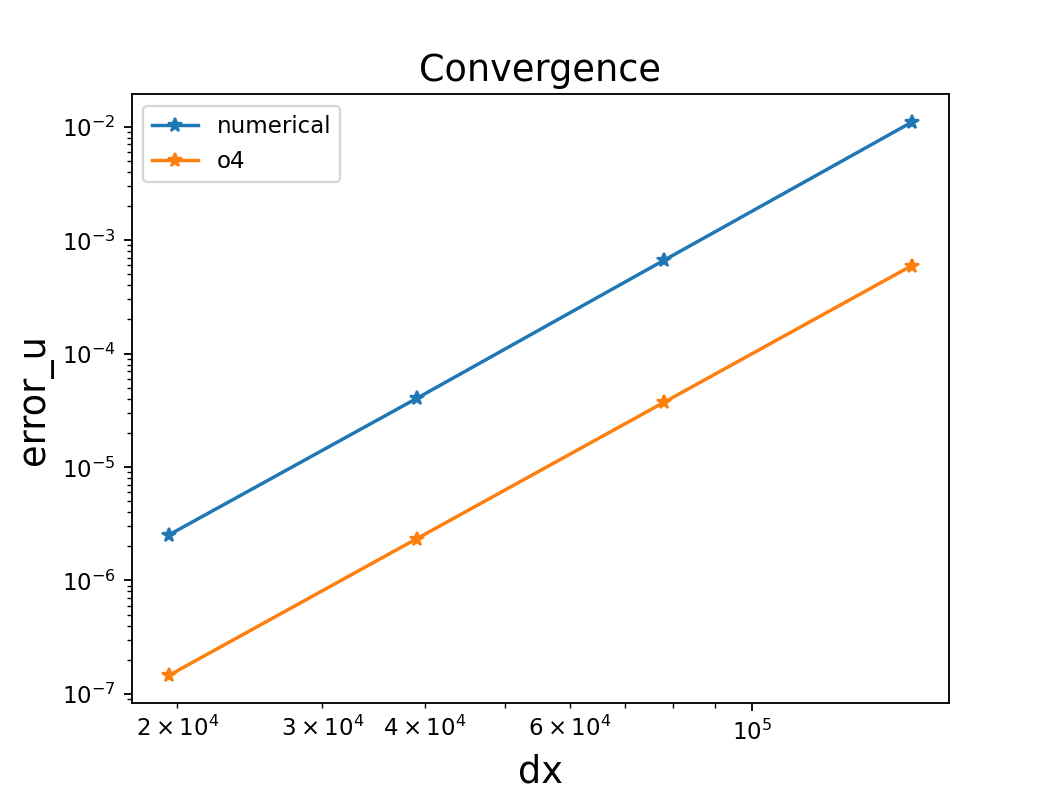

<IPython.core.display.Javascript object>


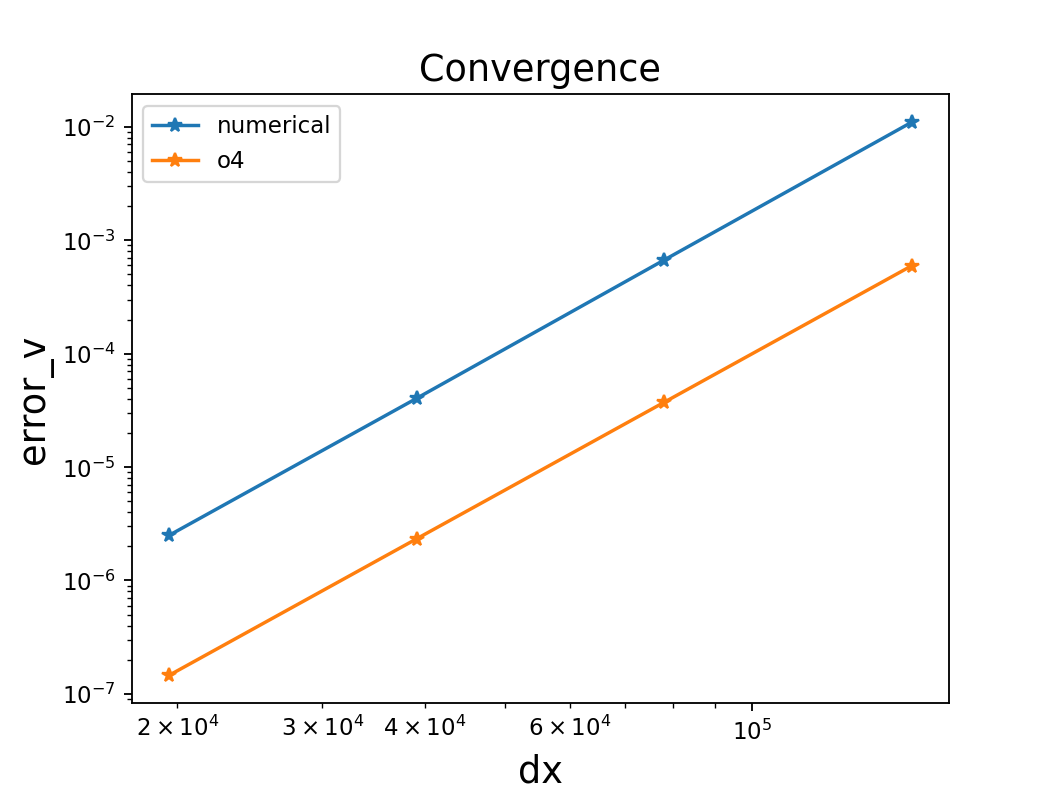

<IPython.core.display.Javascript object>


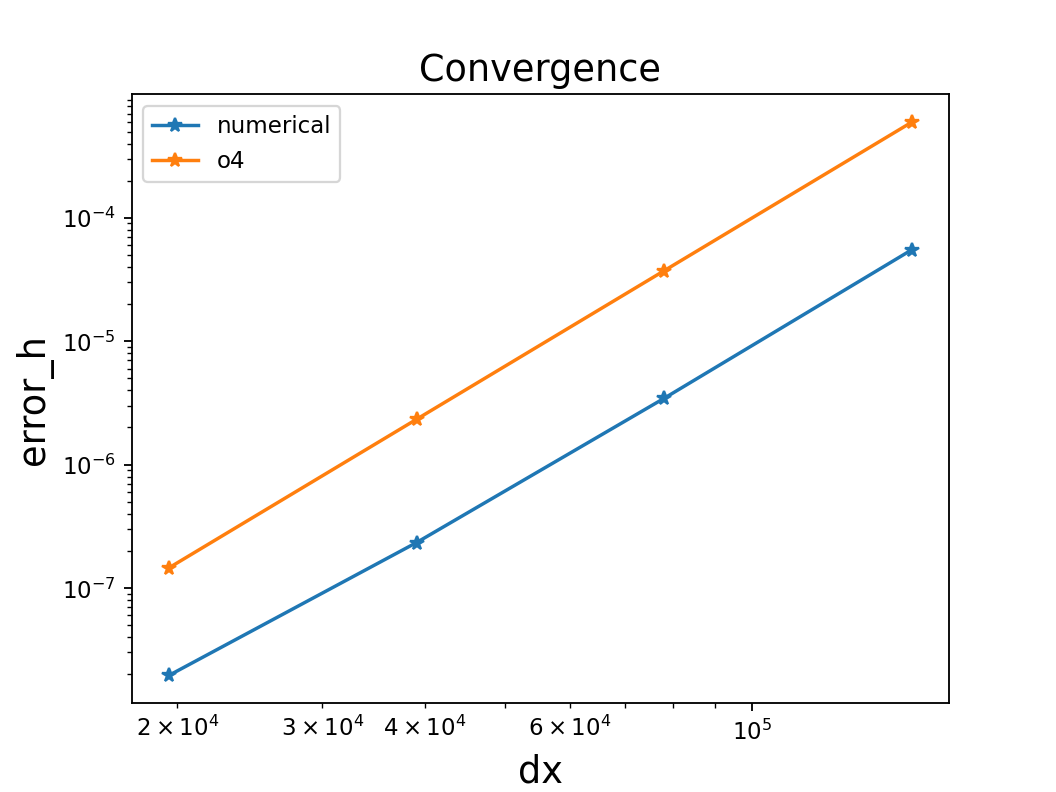

In [13]:
plt.plot(grid_size, error_vec_o4_u, '-*',grid_size, np.array(grid_size)**4*10**(-24), '-*')
plt.loglog()
plt.legend(('numerical','o4'))
plt.title('Convergence', fontsize=16)
plt.xlabel('dx', fontsize=16)
plt.ylabel('error_u', fontsize=16)
plt.show()

plt.plot(grid_size, error_vec_o4_v, '-*',grid_size, 10**(-24)*np.array(grid_size)**4, '-*')
plt.loglog()
plt.legend(('numerical','o4'))
plt.title('Convergence', fontsize=16)
plt.xlabel('dx', fontsize=16)
plt.ylabel('error_v', fontsize=16)
plt.show()

plt.plot(grid_size, error_vec_o4_h, '-*',grid_size, 10**(-24)*np.array(grid_size)**4, '-*')
plt.loglog()
plt.legend(('numerical','o4'))
plt.title('Convergence', fontsize=16)
plt.xlabel('dx', fontsize=16)
plt.ylabel('error_h', fontsize=16)
plt.show()
